# Homework 1 - Using OLS
## Data Analysis
### FINM August Review 

Mark Hendricks

hendricks@uchicago.edu

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

# Data
* This homework uses the file, `/data/multi_asset_etf_data.xlsx`.
* Find the data in the Github repo associated with the module, (link on Canvas.)

The data file contains...
* Return rates, $r_t^i$, for various asset classes, (via ETFs.)
* Most notable among these securities is SPY, the return on the S&P 500. Denote this as $r^{\spy}_t$.
* A separate tab gives return rates for a particular portfolio, $r_t^p$.

In [48]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 1. Regression
## 1. 
Estimate the regression of the portfolio return on SPY:

$$r^p_t = \alpha + \beta r^{\spy}_t + \epsilon_t^{p,\spy}$$

Specifically, report your estimates of alpha, beta, and the r-squared.

## Solution to 1

In [49]:
#Importing data from excel
prtf_rtn = pd.read_excel("../data/multi_asset_etf_data.xlsx", sheet_name = 'portfolio returns', index_col = 'Date')
other_asst_rtn = pd.read_excel("../data/multi_asset_etf_data.xlsx", sheet_name = 'security returns', index_col = 'Date')

In [50]:
#new_df = pd.ExcelFile("../data/multi_asset_etf_data.xlsx")
#new_df.sheet_names

In [51]:
#Joining two dataframes to create one dataframe
all_rtns = prtf_rtn.join(other_asst_rtn, how = 'left')

#Printing # of rows for each dataframe to ensure correctness of the join
print(f"Rows for Portfolio Returns: {all_rtns.shape[0]}\n\
Rows for Other Asset Returns: {other_asst_rtn.shape[0]}\n\
Rows for All Asset Returns: {all_rtns.shape[0]}")

Rows for Portfolio Returns: 170
Rows for Other Asset Returns: 170
Rows for All Asset Returns: 170


In [52]:
#Creating Pandas Series for the regressor
rt_spy = all_rtns['SPY']

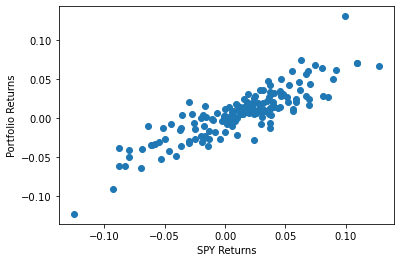

SPY and Porfolio returns seem to be positively correlated


In [53]:
#Exploring the relationship between SPY and Portfolio Returns
plt.scatter(rt_spy, prtf_rtn)
plt.xlabel("SPY Returns")
plt.ylabel("Portfolio Returns")
plt.show()
print("SPY and Porfolio returns seem to be positively correlated")

In [54]:
#Building a linear regression model
X = sm.add_constant(rt_spy)
y = prtf_rtn
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     530.3
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           7.47e-54
Time:                        11:36:14   Log-Likelihood:                 469.82
No. Observations:                 170   AIC:                            -935.6
Df Residuals:                     168   BIC:                            -929.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0013      0.001     -1.090      0.2

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### The model paramters $\alpha ,\beta $ and the goodness of fit $R^2$

In [55]:
print(f"α = {model.params[0]: .5f} \n\
β_spy = {model.params[1]: .5f}\n\
RSquared = {model.rsquared: .5f}")

α = -0.00134 
β_spy =  0.63751
RSquared =  0.75942


In [56]:
#Getting fitted values and plotting them against actual values
fitted_values = pd.Series(model.fittedvalues)

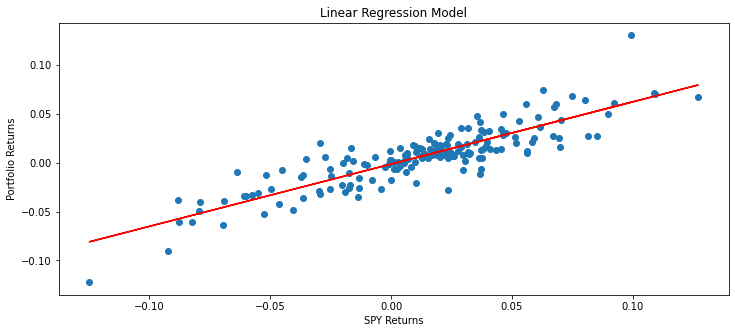

In [57]:
fig = plt.figure(figsize = (12,5))
plt.scatter(rt_spy, prtf_rtn)
plt.xlabel("SPY Returns")
plt.ylabel("Portfolio Returns")
plt.plot(rt_spy,fitted_values, color = 'Red')
plt.title("Linear Regression Model")
plt.show()

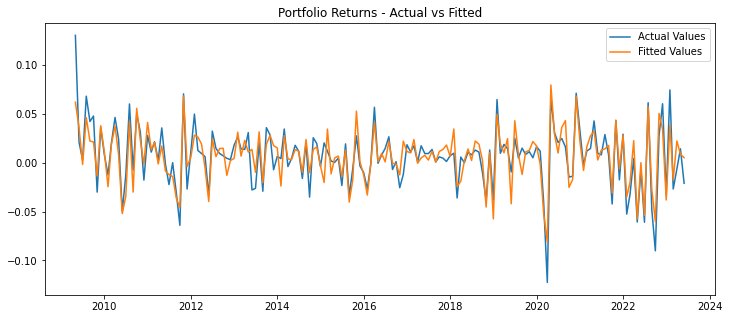

In [58]:
df_y_ftd_val = prtf_rtn.join(pd.DataFrame(fitted_values, columns = ['fitted_values']), how = "left")
fig = plt.figure(figsize = (12,5))
plt.title("Portfolio Returns - Actual vs Fitted")
plt.plot(df_y_ftd_val.index, df_y_ftd_val[['portfolio','fitted_values']], label=['Actual Values','Fitted Values'])
plt.legend()
plt.show()


## 2. 
Estimate the regression of the portfolio return on SPY and on HYG, the return on high-yield
corporate bonds, denoted as $r^{\hyg}_t$:

$$r^p_t = {\alpha} + {\beta}^{\spy}r^{\spy}_t + {\beta}^{\hyg}r^{\hyg}_t + {\epsilon}_t$$

Specifically, report your estimates of alpha, the betas, and the r-squared.

*Note that the parameters (such as $\beta^{\spy}$) in this multivariate model are not the same as used in the univariate model of part 1.

## Solution to 2

In [59]:
#Creating a a regressor with SPY and High Yield Corporate Bonds Returns
X = sm.add_constant(all_rtns[['SPY','HYG']])
y = prtf_rtn
multivariate_model = sm.OLS(y,X).fit()
print(multivariate_model.summary())

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     427.6
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           1.99e-66
Time:                        11:36:14   Log-Likelihood:                 502.72
No. Observations:                 170   AIC:                            -999.4
Df Residuals:                     167   BIC:                            -990.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.001     -1.378      0.1

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### Model paramters $\alpha_1 , \beta^{spy}, \beta^{hyg}$,   and $R^2_1$ for the multivariate regression model are

In [60]:
print(f"α_1 = {multivariate_model.params[0]: .5f} \n\
β_spy = {multivariate_model.params[1]: .5f} \n\
β_hyg = {multivariate_model.params[2]: .5f} \n\
RSquared_1 = {multivariate_model.rsquared: .5f}")

α_1 = -0.00140 
β_spy =  0.39224 
β_hyg =  0.52529 
RSquared_1 =  0.83663


## 3. 
Calculate the series of fitted regression values, sometimes referred to as $\hat{y}$ in standard textbooks:

$$\hat{r}^p_t = \hat{\alpha} + \hat{\beta}^{\spy}r^{\spy}_t + \hat{\beta}^{\hyg}r^{\hyg}_t$$

Your statistical package will output these fitted values for you, or you can construct them using the estimated parameters.

How does this compare to the r-squared of the regression in problem 2?

##### Comment on $R^2$
Adding more regressors to the model increases the $R^{2}$ value of the model. This is because the more the number of regressors, the more the variation in the regressand is explained by the regressors.

In [71]:
#Fitted values for multivariate regression model
mltvar_ftd_val = pd.DataFrame(multivariate_model.fittedvalues, columns = ['fitted_values'])

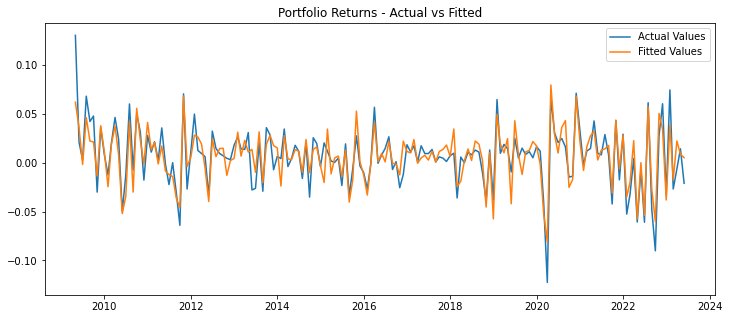

In [73]:
#Joining the fitted values to the original dataframe to plot the results
df_orgnl_ftd_val = prtf_rtn.join(mltvar_ftd_val, how = 'left')
fig = plt.figure(figsize = (12,5))
plt.title("Portfolio Returns - Actual vs Fitted")
plt.plot(df_orgnl_ftd_val.index, df_y_ftd_val[['portfolio','fitted_values']], label=['Actual Values','Fitted Values'])
plt.legend()
plt.show()

## 4. 
How do the SPY betas differ across the univariate and multivariate models? How does this relate to the
correlation between $r^{\spy}$ and $r^{\hyg}$?

##### Comment on difference in Beta Values

In [85]:
x1 = 'SPY'
x2 = 'HYG'
corr_x1_x2 = all_rtns['SPY'].corr(all_rtns['HYG'])
print(f"Correlation between {x1} and {x2} is = {corr_x1_x2: .4%}")

Correlation between SPY and HYG is =  76.9945%


When the regressors are highly correlated, adding additional regressors to the equation decreases the beta value for already existing regressors. When HYG wasn't added to the single variable regression, SPY had to account for explaining the variation in portfolio returns that was attributed to HYG. That is to say that beta SPY was overburdened with the task.

Having introduced the HYG regressor allows HYG to explain its due share of variation for the returns and SPY doesn't need to do extra work.

## 5. 
Without doing any calculation, would you expect the sample residual of the univariate regression or multivariate regression to have higher correlation to $r^{\hyg}$?

Since the multivariable regression has $r^{hyg}$ as a regressor, and we know that the regressors should have zero in-sample correlation with the residulars based on the assumption that $E[X \epsilon] = 0 $. The sample residuals in the multivariate regression will have zero coorelation to $r^{hyg}$.
However, since the single variable regression doesn't include $r^{hyg}$ as a regressor, there will be correlation between the in-sample residuals and this particular regressor.

***

# 2. Decomposing and Replicating

## 1.
The portfolio return, $r_t^p$, is a combination of the base assets that are provided here. Use linear regression to uncover which weights were used in constructing the portfolio.

$$r_t^p = \alpha +\left(\boldsymbol{\beta}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the individual securities.
* What does the regression find were the original weights?
* How precise is the estimation? Consider the R-squared and t-stats.

*Feel free to include an $\alpha$ in this model, even though you know the portfolio is an exact function of the individual securities. The estimation should find $\alpha$ of (nearly) zero.*

In [90]:
X = sm.add_constant(all_rtns.drop(columns = 'portfolio'))
y = prtf_rtn
mult_mod_2 = sm.OLS(y, X).fit()
print(mult_mod_2.summary())

                            OLS Regression Results                            
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.507e+28
Date:                Mon, 31 Jul 2023   Prob (F-statistic):               0.00
Time:                        13:28:21   Log-Likelihood:                 5738.3
No. Observations:                 170   AIC:                        -1.145e+04
Df Residuals:                     157   BIC:                        -1.141e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.293e-16   5.34e-17      9.917      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The $R^2$ value is exactly 1, which means that the regressors are explaining all the variation in portfolio returns $r^p_t$ i.e. It is the regressors and not the residual values that explain the movement in portfolio returns.

However, if we look at individual $Beta$ coefficients, we can see that keeping all other regressors constant a particular regressor doesn't have much of an impact on the returns. For example, SPY. Also, the t-values are too small which means one can't reject the null hypothesis that the regressor has no relationship with returns.

Looking at the size of the co-efficient and the t-values both, one can conclude that most regressors don't have explain the impact well. Also, the t-values tell that the co-efficients are not statistically significant.

## 2.

$$\newcommand{\targ}{EEM}$$

Suppose that we want to mimic a return, **EEM** using the other returns. Run the following regression–but
do so **only using data through the end of 2020.**

$$r_t^{\targ} = \alpha +\left(\boldsymbol{\beta}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the other securities, excluding the target, **EEM**.

#### (a) 
Report the r-squared and the estimate of the vector, $\boldsymbol{\beta}$.

#### (b) 
Report the t-stats of the explanatory returns. Which have absolute value greater than 2?

#### (c) 
Plot the returns of **EEM** along with the replication values.

## 3.
Perhaps the replication results in the previous problem are overstated given that they estimated the parameters within a sample and then evaluated how well the result fit in the same sample. This is known as in-sample fit.

Using the estimates through **2020**, (the α and βˆ from the previous problem,) calculate the out-of-sample (OOS) values of the replication, using the **2021-2023** returns, denoted $\boldsymbol{r}_t^{\text{oos}}$:

$$\hat{r}_t^{\targ} = \left(\widehat{\boldsymbol{\beta}}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t^{\text{oos}}$$

#### (a) 
What is the correlation between $\hat{r}_t^{\targ}$ and $\boldsymbol{r}_t^{\text{oos}}$?

#### (b) 
How does this compare to the r-squared from the regression above based on in-sample data, (through 2020?)

***